# Excercise 3

Answer: 
For financial data, I would use the API from Yahoo Finance, since it has a lot of features for most companies (e.g. sustainabilty data, historical data for a very long period, etc. )

Other than that, it is one of the most famous and easily usable with Python. 

Install with pip:
 - pip install yfinance
 
 
Research questions would depend on my use case. 
 - In general a high coverage of companies, indices, bonds, etc. and historical data.
 - Depending on the use case, the usage of the API should be free of charge.
 - The source should be reliable (Yahoo Finance is an established data + news provider)
 - Preferably no time gaps in the data


In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/Users/otar/anaconda3/envs/tensorflow/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
ticker = 'TSLA'

In [3]:
tsla = yf.Ticker(ticker)

In [4]:
hist = tsla.history(period='1y')

In [12]:
pd.datetime(hist.index[0])

/Users/otar/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """Entry point for launching an IPython kernel.


TypeError: an integer is required (got type Timestamp)

In [5]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-22,834.309998,848.000000,828.619995,846.640015,20066500,0,0
2021-01-25,855.000000,900.400024,838.820007,880.799988,41173400,0,0
2021-01-26,891.380005,895.900024,871.599976,883.090027,23131600,0,0
2021-01-27,870.349976,891.500000,858.659973,864.159973,27334000,0,0
2021-01-28,820.000000,848.000000,801.000000,835.429993,26378000,0,0
...,...,...,...,...,...,...,...
2022-01-14,1019.880005,1052.000000,1013.380005,1049.609985,24246600,0,0
2022-01-18,1026.609985,1070.790039,1016.059998,1030.510010,22247800,0,0
2022-01-19,1041.709961,1054.670044,995.000000,995.650024,25147500,0,0


/Users/otar/anaconda3/envs/tensorflow/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


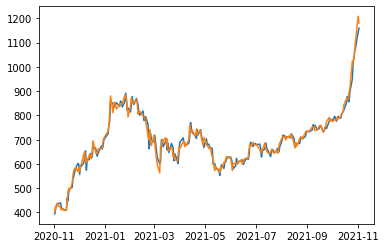

In [6]:
plt.plot(hist.Open)
plt.plot(hist.Close)

<BarContainer object of 252 artists>

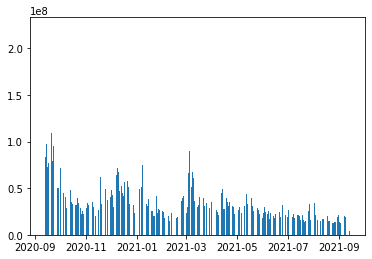

In [46]:
plt.bar(hist.index, hist.Volume)

In [14]:
ticks = ['MSFT', 'AAPL', 'GM', 'TSLA', 'PYPL']

In [15]:
cola = "KO"
cola_y = yf.Ticker(cola)
esg_data = pd.DataFrame.transpose(cola_y.sustainability)
esg_data['company_ticker'] = str(cola_y.ticker)

In [16]:
# Retrieve Yahoo! Finance Sustainability Scores for each ticker
for i in ticks:
    i_y = yf.Ticker(i)
    try:
        if i_y.sustainability is not None:
            temp = pd.DataFrame.transpose(i_y.sustainability)
            temp['company_ticker'] = str(i_y.ticker)
            esg_data = esg_data.append(temp)
    except IndexError:
        pass

In [54]:
esg_data.columns

Index(['palmOil', 'controversialWeapons', 'gambling', 'socialScore', 'nuclear',
       'furLeather', 'alcoholic', 'gmo', 'catholic', 'socialPercentile',
       'peerCount', 'governanceScore', 'environmentPercentile',
       'animalTesting', 'tobacco', 'totalEsg', 'highestControversy',
       'esgPerformance', 'coal', 'pesticides', 'adult', 'percentile',
       'peerGroup', 'smallArms', 'environmentScore', 'governancePercentile',
       'militaryContract', 'company_ticker'],
      dtype='object', name='2021-9')

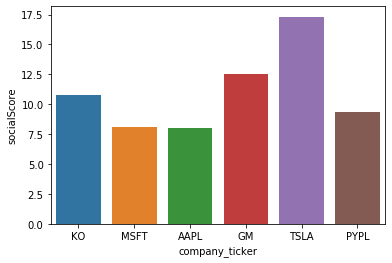

In [52]:
ax = sns.barplot(x = 'company_ticker', y = 'socialScore', data=esg_data)

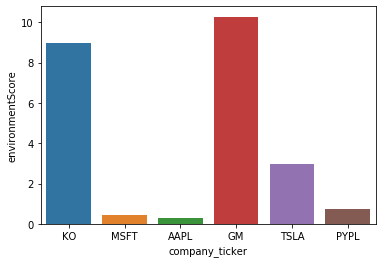

In [53]:
ax = sns.barplot(x = 'company_ticker', y = 'environmentScore', data=esg_data)

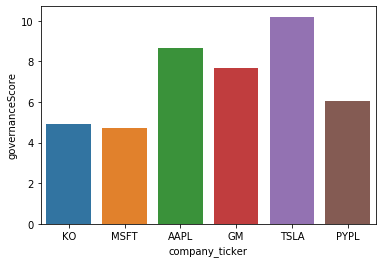

In [55]:
ax = sns.barplot(x = 'company_ticker', y = 'governanceScore', data=esg_data)